<a href="https://colab.research.google.com/github/sujira7236212/PKLot_Detection/blob/main/PK_Detect_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


# Model 1 (No Augmentation)
dataset: Combine_Parking_Lot

model:  yolo11n

epochs: 50

image size: 640

batch: 16


# Evaluation Model 1

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Starting Model Evaluation...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 1.6±1.0 ms, read: 3.2±6.9 MB/s, size: 60.0 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/labels/test... 187 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 187/187 2.5it/s 1:16
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-11_16_10_41_jpg.rf.aa2bdc47a7852e3bce128fbd6a840224.jpg: 1 duplicate labels removed
v

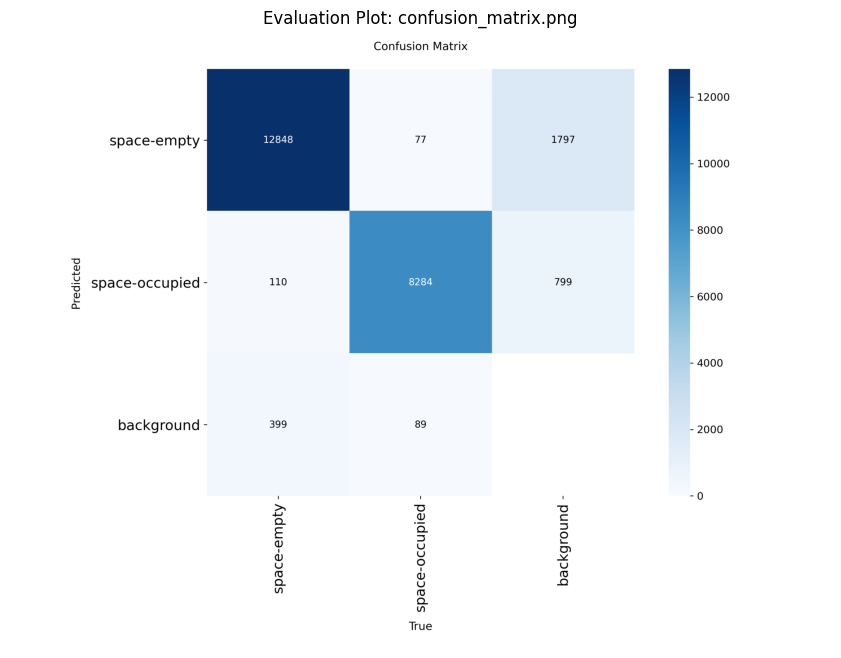

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm  # Import tqdm

# 1. Load your trained model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/combined_best_3.pt')

# 2. Run Evaluation
print("Starting Model Evaluation...")
# Note: model.val() has its own internal progress bar that will appear automatically
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/data_noaug.yaml',
                    split='test',
                    plots=True)

# 3. Print numeric results
print("\n" + "="*30)
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5-0.95: {metrics.box.map:.4f}")
print("="*30 + "\n")

# 4. Display Graphs with tqdm
save_dir = metrics.save_dir
images_to_show = ['confusion_matrix.png', 'F1_curve.png', 'results.png']

print("Loading evaluation graphs...")

# We wrap our list with tqdm to show a progress bar for the plotting steps
for img_name in images_to_show:
    img_path = os.path.join(save_dir, img_name)

    if os.path.exists(img_path):
        plt.figure(figsize=(12, 8))
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Evaluation Plot: {img_name}")
        plt.show()
    else:
        print(f"Warning: Could not find {img_name}")

In [ ]:
import numpy as np


print("="*30)
print("     EVALUATION RESULTS     ")
print("="*30)

# 1. Extract Data Arrays
p_data = metrics.box.p  # Precision Array
r_data = metrics.box.r  # Recall Array

# Handle multi-class averaging (same as your previous code)
if p_data.ndim > 1:
    mean_p = p_data.mean(axis=0)
    mean_r = r_data.mean(axis=0)
else:
    mean_p = p_data
    mean_r = r_data

# 2. Define the Confidence Scale (0 to 1)
x_axis = np.linspace(0, 1, len(mean_p))

# 3. Find the index for Confidence = 0.5 (Standard)
idx_05 = np.abs(x_axis - 0.5).argmin()

# 4. Find the index for "Best F1" (Optimal Performance)
# Calculate F1 score for every threshold: 2 * (P*R) / (P+R)
f1_scores = 2 * (mean_p * mean_r) / (mean_p + mean_r + 1e-16)
idx_best = np.argmax(f1_scores)
best_conf = x_axis[idx_best]

# 5. Print the Numbers
print(f"\n--- At Confidence Threshold: 0.50 ---")
print(f"Precision : {mean_p[idx_05]:.4f}")
print(f"Recall    : {mean_r[idx_05]:.4f}")

print(f"\n--- At Optimal Threshold ({best_conf:.2f}) ---")
print(f"Precision : {mean_p[idx_best]:.4f}")
print(f"Recall    : {mean_r[idx_best]:.4f}")
print(f"F1 Score  : {f1_scores[idx_best]:.4f}")

print("\n" + "="*30)

     EVALUATION RESULTS     

--- At Confidence Threshold: 0.50 ---
Precision : 0.8940
Recall    : 0.9422

--- At Optimal Threshold (1.00) ---
Precision : 0.9286
Recall    : 0.9596
F1 Score  : 0.9439



# Inference Model 1


image 1/1 /content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg: 512x640 37 space-emptys, 63 space-occupieds, 273.0ms
Speed: 4.2ms preprocess, 273.0ms inference, 24.7ms postprocess per image at shape (1, 3, 512, 640)


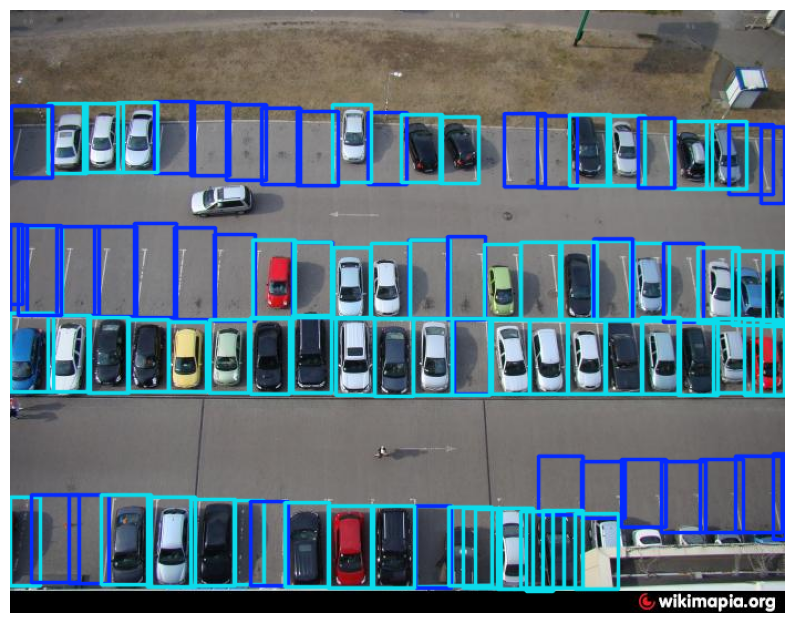

space-empty: 37
space-occupied: 63


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/combined_best_3.pt')

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-2.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-3.png'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-4.png'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-5.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg'

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-11_15_27_08_jpg.rf.5df10579e719bba88d0f469a0134d0d8.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_13_24_58_jpg.rf.46397714482a546f58fcedff38d4fa2f.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_16_02_08_jpg.rf.09c806f1b912069a5eee309b4bf226a6.jpg'

# Run detection
results = model.predict(test_img,conf=0.15)

# results is a list, usually with 1 element for a single image
result = results[0]  # get the first Results object

# Show image with bounding boxes inline
annotated_img = result.plot(labels=False)  # draws boxes on image

# Convert BGR to RGB for matplotlib
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Get class labels
class_labels = result.names  # dict: {0: 'empty', 1: 'occupied'} based on your training

# Extract all detected class IDs
class_ids = result.boxes.cls.cpu().numpy().astype(int)

# Count detections for each class
unique, counts = np.unique(class_ids, return_counts=True)
class_counts = dict(zip(unique, counts))

# Print results
for class_id, count in class_counts.items():
    print(f"{class_labels[class_id]}: {count}")

# If some classes have zero detections, you can manually print them too
for class_id in class_labels:
    if class_id not in class_counts:
        print(f"{class_labels[class_id]}: 0")

# Model 2
dataset: Combine_Parking_Lot

model: yolo11s

epochs: 100

image size: 640

batch: 16

# Evaluation Model 2

Starting Model Evaluation...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 2.2±1.7 ms, read: 10.1±9.4 MB/s, size: 66.6 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/labels/test.cache... 187 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 187/187 226.2Kit/s 0.0s
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-11_16_10_41_jpg.rf.aa2bdc47a7852e3bce128fbd6a840224.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-12_06_10_30_jpg.rf.c1ad5e902fc923cef00e849c61d1c7ef.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking

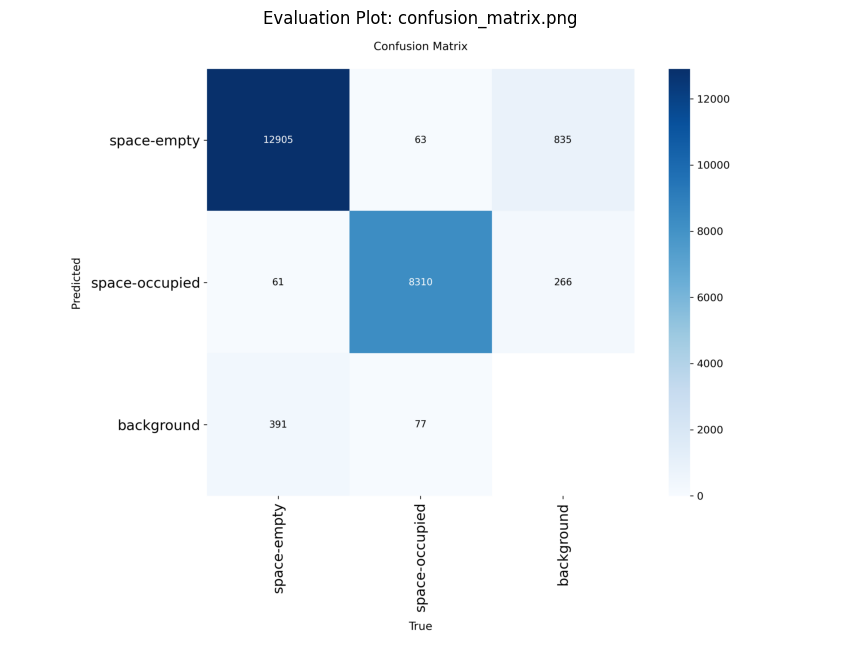

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm  # Import tqdm

# 1. Load your trained model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/best_small100.pt')

# 2. Run Evaluation
print("Starting Model Evaluation...")
# Note: model.val() has its own internal progress bar that will appear automatically
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/data_noaug.yaml',
                    split='test',
                    plots=True)

# 3. Print numeric results
print("\n" + "="*30)
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5-0.95: {metrics.box.map:.4f}")
print("="*30 + "\n")

# 4. Display Graphs with tqdm
save_dir = metrics.save_dir
images_to_show = ['confusion_matrix.png', 'F1_curve.png', 'results.png']

print("Loading evaluation graphs...")

# We wrap our list with tqdm to show a progress bar for the plotting steps
for img_name in images_to_show:
    img_path = os.path.join(save_dir, img_name)

    if os.path.exists(img_path):
        plt.figure(figsize=(12, 8))
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Evaluation Plot: {img_name}")
        plt.show()
    else:
        print(f"Warning: Could not find {img_name}")

In [ ]:
import numpy as np

# Ensure you have the metrics object from:
# metrics = model.val(...)

print("="*30)
print("     EVALUATION RESULTS     ")
print("="*30)

# 1. Extract Data Arrays
p_data = metrics.box.p  # Precision Array
r_data = metrics.box.r  # Recall Array

# Handle multi-class averaging (same as your previous code)
if p_data.ndim > 1:
    mean_p = p_data.mean(axis=0)
    mean_r = r_data.mean(axis=0)
else:
    mean_p = p_data
    mean_r = r_data

# 2. Define the Confidence Scale (0 to 1)
x_axis = np.linspace(0, 1, len(mean_p))

# 3. Find the index for Confidence = 0.5 (Standard)
idx_05 = np.abs(x_axis - 0.5).argmin()

# 4. Find the index for "Best F1" (Optimal Performance)
# Calculate F1 score for every threshold: 2 * (P*R) / (P+R)
f1_scores = 2 * (mean_p * mean_r) / (mean_p + mean_r + 1e-16)
idx_best = np.argmax(f1_scores)
best_conf = x_axis[idx_best]

# 5. Print the Numbers
print(f"\n--- At Confidence Threshold: 0.50 ---")
print(f"Precision : {mean_p[idx_05]:.4f}")
print(f"Recall    : {mean_r[idx_05]:.4f}")

print(f"\n--- At Optimal Threshold ({best_conf:.2f}) ---")
print(f"Precision : {mean_p[idx_best]:.4f}")
print(f"Recall    : {mean_r[idx_best]:.4f}")
print(f"F1 Score  : {f1_scores[idx_best]:.4f}")

print("\n" + "="*30)

     EVALUATION RESULTS     

--- At Confidence Threshold: 0.50 ---
Precision : 0.9437
Recall    : 0.9534

--- At Optimal Threshold (1.00) ---
Precision : 0.9667
Recall    : 0.9780
F1 Score  : 0.9723



# Inference Model 2


image 1/1 /content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg: 512x640 16 space-emptys, 17 space-occupieds, 641.3ms
Speed: 11.7ms preprocess, 641.3ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 640)


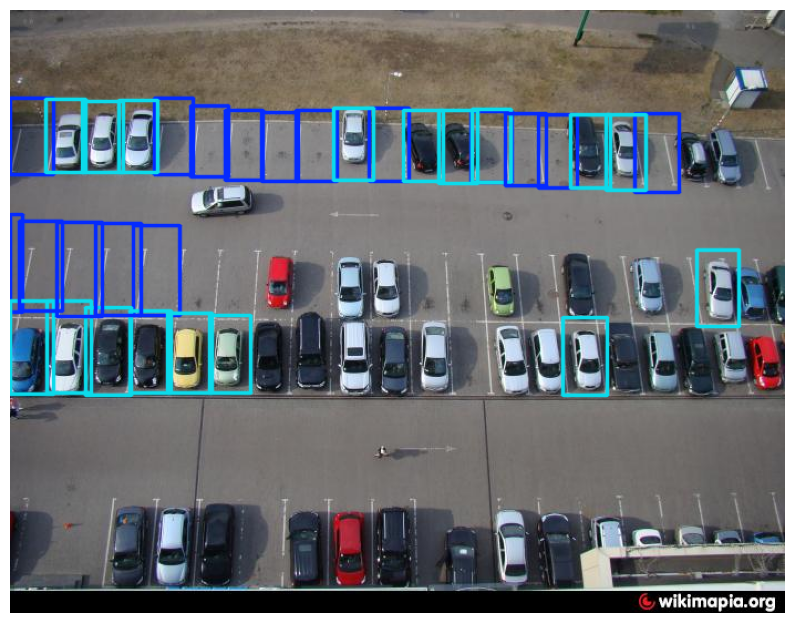

space-empty: 16
space-occupied: 17


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/best_small100.pt')

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-2.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-3.png'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-4.png'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-5.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg'

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-11_15_27_08_jpg.rf.5df10579e719bba88d0f469a0134d0d8.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_13_24_58_jpg.rf.46397714482a546f58fcedff38d4fa2f.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_16_02_08_jpg.rf.09c806f1b912069a5eee309b4bf226a6.jpg'

# Run detection
results = model.predict(test_img,conf=0.15)

# results is a list, usually with 1 element for a single image
result = results[0]  # get the first Results object

# Show image with bounding boxes inline
annotated_img = result.plot(labels=False)  # draws boxes on image

# Convert BGR to RGB for matplotlib
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Get class labels
class_labels = result.names  # dict: {0: 'empty', 1: 'occupied'} based on your training

# Extract all detected class IDs
class_ids = result.boxes.cls.cpu().numpy().astype(int)

# Count detections for each class
unique, counts = np.unique(class_ids, return_counts=True)
class_counts = dict(zip(unique, counts))

# Print results
for class_id, count in class_counts.items():
    print(f"{class_labels[class_id]}: {count}")

# If some classes have zero detections, you can manually print them too
for class_id in class_labels:
    if class_id not in class_counts:
        print(f"{class_labels[class_id]}: 0")

# Model 3 (No Augmentation)
dataset: Combine_Parking_Lot

model:  yolo11m

epochs: 100

image size: 640

batch: 16

# Evaluation Model 3

Starting Model Evaluation...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 1.7±0.8 ms, read: 13.4±5.9 MB/s, size: 60.6 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/labels/test.cache... 187 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 187/187 181.8Kit/s 0.0s
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-11_16_10_41_jpg.rf.aa2bdc47a7852e3bce128fbd6a840224.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-12_06_10_30_jpg.rf.c1ad5e902fc923cef00e849c61d1c7ef.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parkin

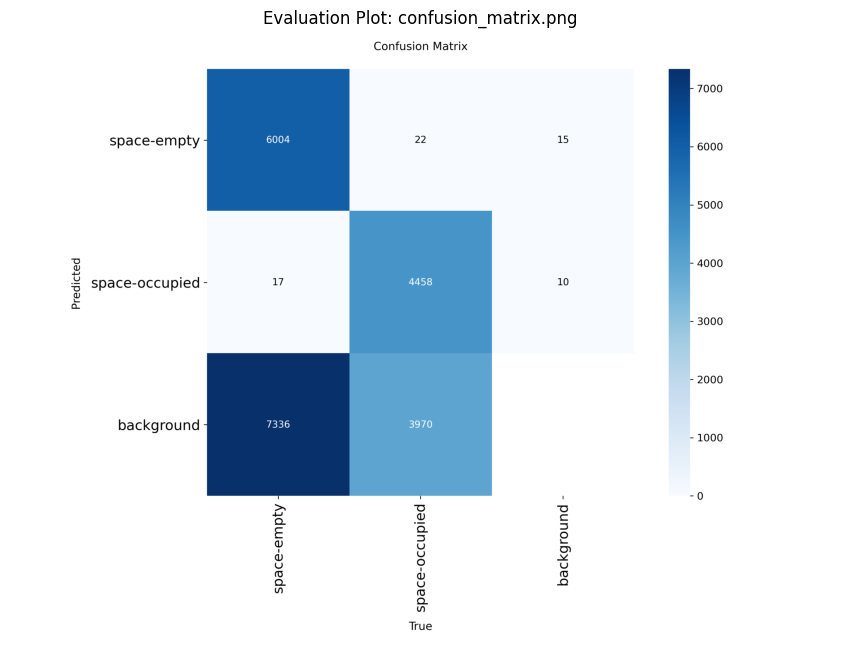

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm  # Import tqdm

# 1. Load your trained model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/best_noaug_100.pt')

# 2. Run Evaluation
print("Starting Model Evaluation...")
# Note: model.val() has its own internal progress bar that will appear automatically
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/data_noaug.yaml',
                    split='test',
                    plots=True)

# 3. Print numeric results
print("\n" + "="*30)
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5-0.95: {metrics.box.map:.4f}")
print("="*30 + "\n")

# 4. Display Graphs with tqdm
save_dir = metrics.save_dir
images_to_show = ['confusion_matrix.png', 'F1_curve.png', 'results.png']
print("Loading evaluation graphs...")

for img_name in images_to_show:
    img_path = os.path.join(save_dir, img_name)

    if os.path.exists(img_path):
        plt.figure(figsize=(12, 8))
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Evaluation Plot: {img_name}")
        plt.show()
    else:
        print(f"Warning: Could not find {img_name}")

In [ ]:
import numpy as np

# Ensure you have the metrics object from:
# metrics = model.val(...)

print("="*30)
print("     EVALUATION RESULTS     ")
print("="*30)

# 1. Extract Data Arrays
p_data = metrics.box.p  # Precision Array
r_data = metrics.box.r  # Recall Array

# Handle multi-class averaging (same as your previous code)
if p_data.ndim > 1:
    mean_p = p_data.mean(axis=0)
    mean_r = r_data.mean(axis=0)
else:
    mean_p = p_data
    mean_r = r_data

# 2. Define the Confidence Scale (0 to 1)
x_axis = np.linspace(0, 1, len(mean_p))

# 3. Find the index for Confidence = 0.5 (Standard)
idx_05 = np.abs(x_axis - 0.5).argmin()

# 4. Find the index for "Best F1" (Optimal Performance)
# Calculate F1 score for every threshold: 2 * (P*R) / (P+R)
f1_scores = 2 * (mean_p * mean_r) / (mean_p + mean_r + 1e-16)
idx_best = np.argmax(f1_scores)
best_conf = x_axis[idx_best]

# 5. Print the Numbers
print(f"\n--- At Confidence Threshold: 0.50 ---")
print(f"Precision : {mean_p[idx_05]:.4f}")
print(f"Recall    : {mean_r[idx_05]:.4f}")

print(f"\n--- At Optimal Threshold ({best_conf:.2f}) ---")
print(f"Precision : {mean_p[idx_best]:.4f}")
print(f"Recall    : {mean_r[idx_best]:.4f}")
print(f"F1 Score  : {f1_scores[idx_best]:.4f}")

print("\n" + "="*30)

     EVALUATION RESULTS     

--- At Confidence Threshold: 0.50 ---
Precision : 0.9918
Recall    : 0.4516

--- At Optimal Threshold (1.00) ---
Precision : 0.9894
Recall    : 0.5291
F1 Score  : 0.6895



#Inference Model 3


image 1/1 /content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg: 512x640 17 space-emptys, 36 space-occupieds, 1636.4ms
Speed: 12.7ms preprocess, 1636.4ms inference, 10.5ms postprocess per image at shape (1, 3, 512, 640)


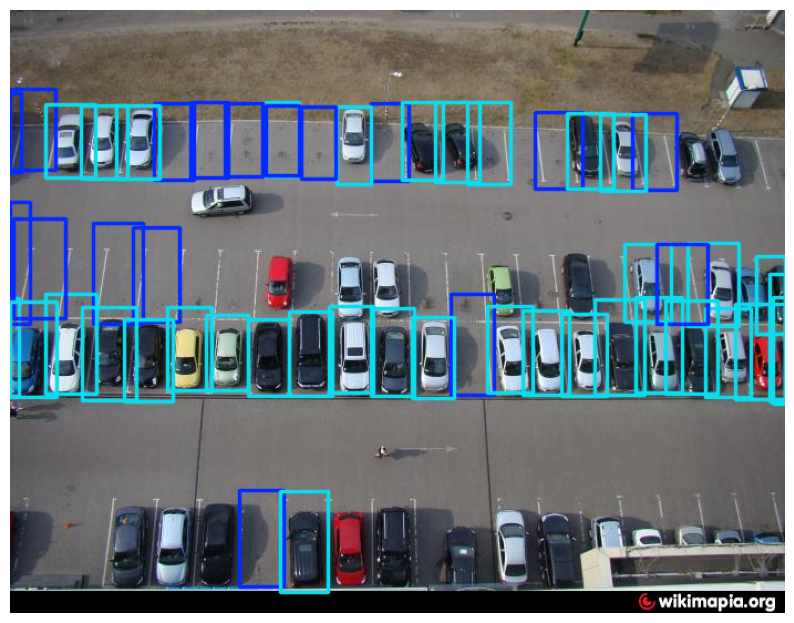

space-empty: 17
space-occupied: 36


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/best_noaug_100.pt')

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-2.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-3.png'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-4.png'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-5.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg'

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-11_15_27_08_jpg.rf.5df10579e719bba88d0f469a0134d0d8.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_13_24_58_jpg.rf.46397714482a546f58fcedff38d4fa2f.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_16_02_08_jpg.rf.09c806f1b912069a5eee309b4bf226a6.jpg'

# Run detection
results = model.predict(test_img,conf=0.15)

# results is a list, usually with 1 element for a single image
result = results[0]  # get the first Results object

# Show image with bounding boxes inline
annotated_img = result.plot(labels=False)  # draws boxes on image

# Convert BGR to RGB for matplotlib
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Get class labels
class_labels = result.names  # dict: {0: 'empty', 1: 'occupied'} based on your training

# Extract all detected class IDs
class_ids = result.boxes.cls.cpu().numpy().astype(int)

# Count detections for each class
unique, counts = np.unique(class_ids, return_counts=True)
class_counts = dict(zip(unique, counts))

# Print results
for class_id, count in class_counts.items():
    print(f"{class_labels[class_id]}: {count}")

for class_id in class_labels:
    if class_id not in class_counts:
        print(f"{class_labels[class_id]}: 0")

# Model 4 (Augmentation)
dataset: Combine_Parking_Lot add augmentation

model:  yolo11s

epochs: 200

image size: 960

batch: 32

# Evaluation Model 4

Starting Model Evaluation...
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 6.3±11.7 ms, read: 15.5±14.3 MB/s, size: 68.5 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/labels/test.cache... 187 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 187/187 166.0Kit/s 0.0s
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-11_16_10_41_jpg.rf.aa2bdc47a7852e3bce128fbd6a840224.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parking_dataset/images/test/2012-09-12_06_10_30_jpg.rf.c1ad5e902fc923cef00e849c61d1c7ef.jpg: 1 duplicate labels removed
val: /content/drive/.shortcut-targets-by-id/1vJhGl19J4g14OuhBxlDVdPO2gvH8pEAG/combined_parki

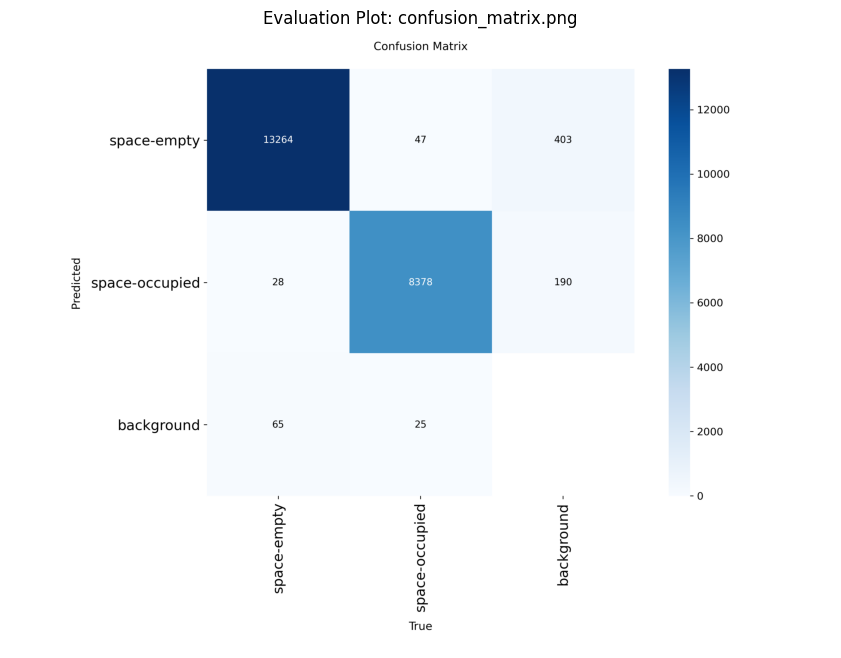

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm  # Import tqdm

# 1. Load your trained model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/combined_best_augmented3.pt')

# 2. Run Evaluation
print("Starting Model Evaluation...")
# Note: model.val() has its own internal progress bar that will appear automatically
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/data_noaug.yaml',
                    split='test',
                    plots=True)

# 3. Print numeric results
print("\n" + "="*30)
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5-0.95: {metrics.box.map:.4f}")
print("="*30 + "\n")

# 4. Display Graphs with tqdm
save_dir = metrics.save_dir
images_to_show = ['confusion_matrix.png', 'F1_curve.png', 'results.png']

print("Loading evaluation graphs...")

for img_name in images_to_show:
    img_path = os.path.join(save_dir, img_name)

    if os.path.exists(img_path):
        plt.figure(figsize=(12, 8))
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Evaluation Plot: {img_name}")
        plt.show()
    else:
        print(f"Warning: Could not find {img_name}")

In [ ]:
import numpy as np

# Ensure you have the metrics object from:
# metrics = model.val(...)

print("="*30)
print("     EVALUATION RESULTS     ")
print("="*30)

# 1. Extract Data Arrays
p_data = metrics.box.p  # Precision Array
r_data = metrics.box.r  # Recall Array

# Handle multi-class averaging
if p_data.ndim > 1:
    mean_p = p_data.mean(axis=0)
    mean_r = r_data.mean(axis=0)
else:
    mean_p = p_data
    mean_r = r_data

# 2. Define the Confidence Scale (0 to 1)
x_axis = np.linspace(0, 1, len(mean_p))

# 3. Find the index for Confidence = 0.5 (Standard)
idx_05 = np.abs(x_axis - 0.5).argmin()

# 4. Find the index for "Best F1" (Optimal Performance)
# Calculate F1 score for every threshold: 2 * (P*R) / (P+R)
f1_scores = 2 * (mean_p * mean_r) / (mean_p + mean_r + 1e-16)
idx_best = np.argmax(f1_scores)
best_conf = x_axis[idx_best]

# 5. Print the Numbers
print(f"\n--- At Confidence Threshold: 0.50 ---")
print(f"Precision : {mean_p[idx_05]:.4f}")
print(f"Recall    : {mean_r[idx_05]:.4f}")

print(f"\n--- At Optimal Threshold ({best_conf:.2f}) ---")
print(f"Precision : {mean_p[idx_best]:.4f}")
print(f"Recall    : {mean_r[idx_best]:.4f}")
print(f"F1 Score  : {f1_scores[idx_best]:.4f}")

print("\n" + "="*30)

     EVALUATION RESULTS     

--- At Confidence Threshold: 0.50 ---
Precision : 0.9747
Recall    : 0.9895

--- At Optimal Threshold (1.00) ---
Precision : 0.9818
Recall    : 0.9897
F1 Score  : 0.9857



# Inference Model 4


image 1/1 /content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-3.png: 640x960 63 space-emptys, 108 space-occupieds, 3191.4ms
Speed: 112.7ms preprocess, 3191.4ms inference, 52.8ms postprocess per image at shape (1, 3, 640, 960)


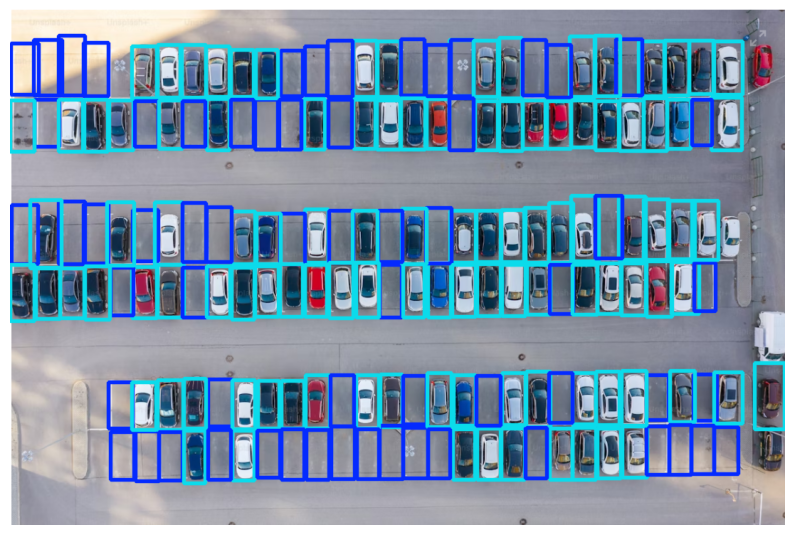

space-empty: 63
space-occupied: 108


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/combined_best_augmented3.pt')

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-2.jpg'
test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-3.png'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-4.png'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-5.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/pk-test-6.jpg'

# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-11_15_27_08_jpg.rf.5df10579e719bba88d0f469a0134d0d8.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_13_24_58_jpg.rf.46397714482a546f58fcedff38d4fa2f.jpg'
# test_img = '/content/drive/MyDrive/Colab Notebooks/combined_parking_dataset/images/test/2012-09-12_16_02_08_jpg.rf.09c806f1b912069a5eee309b4bf226a6.jpg'


# Run detection
results = model.predict(test_img,conf=0.15)

# results is a list, usually with 1 element for a single image
result = results[0]  # get the first Results object

# Show image with bounding boxes inline
annotated_img = result.plot(labels=False)  # draws boxes on image

# Convert BGR to RGB for matplotlib
annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Get class labels
class_labels = result.names  # dict: {0: 'empty', 1: 'occupied'} based on your training

# Extract all detected class IDs
class_ids = result.boxes.cls.cpu().numpy().astype(int)

# Count detections for each class
unique, counts = np.unique(class_ids, return_counts=True)
class_counts = dict(zip(unique, counts))

# Print results
for class_id, count in class_counts.items():
    print(f"{class_labels[class_id]}: {count}")

# If some classes have zero detections, you c an manually print them too
for class_id in class_labels:
    if class_id not in class_counts:
        print(f"{class_labels[class_id]}: 0")